In [3]:
import math
import numpy as np
import copy
import matplotlib.pyplot as plt


def distance2pts(vector1, vector2, p=2):
    #Euclidian p = 2
    #Manhatten p = 1
    num = 0
    for i in range(0,len(vector1)):
        num += abs(vector1[i]-vector2[i]) ** p
    return num ** (1/p)


pointcloudsdummy = np.random.randint(0,500,1500).reshape((500,3))


def kMeans(data, k, feature1, feature2):
    dataset_length = len(data)
    print("Dataset length is: ", dataset_length)

    dataConsidered = data[:,[feature1,feature2]]

    pick_centroids = np.random.randint(0,dataset_length,k)

    print("this is k: ", k)

    centroids = np.empty([k,2])
  
    for i, c in enumerate(pick_centroids):
        centroids[i] = dataConsidered[c]

    clustergroup = np.zeros(dataset_length)
    clustergroup_new = np.zeros(dataset_length)
    
    round = 0
    running = 1
    while running == 1:
        print("start while loop")
        print("round {} centroids: ".format(round), centroids)
        old_centroids = copy.deepcopy(centroids)

        #for each point:
        for i, location in enumerate(dataConsidered):
            distance = float('inf') # our distance from each point to centroid
            #now check for each centroid
            for i2, centroid in enumerate(centroids):
                temp_dist = distance2pts(location, centroid)
                if temp_dist < distance:
                    distance = temp_dist
                    clustergroup_new[i] = i2
         
  
        #update centroids data
        #take all items in dictionary with that centroids, then calculate new center, then update centroid data
        for i, centroid in enumerate(centroids):
            temp_list = np.empty([1,2])
            for i2, item in enumerate(clustergroup_new):
                if item == i:
                    temp_list = np.append(temp_list, [dataConsidered[i2]], axis=0)
            centroids[i] = temp_list.mean(axis=0)
          
        #       Ending correctly or looping

        if np.all(old_centroids == centroids) == True:
            print("Running has been set to zero!!!!!")
            running = 0
            return clustergroup_new, centroids, dataConsidered
        else:
            clustergroup = clustergroup_new

        round += 1
        print("this was round: ", round)


clustergroup_new, centroids, dataConsidered = kMeans(pointcloudsdummy,5, 0, 1)


Dataset length is:  500
this is k:  5
start while loop
round 0 centroids:  [[335. 208.]
 [282. 280.]
 [  8. 448.]
 [163. 103.]
 [294. 262.]]
this was round:  1
start while loop
round 1 centroids:  [[394.85482557 150.29516774]
 [310.06749881 388.26914498]
 [ 79.2328623  388.72853833]
 [130.43527385 120.74773782]
 [336.47646974 276.90615574]]
this was round:  2
start while loop
round 2 centroids:  [[398.13818277 110.29380496]
 [336.0921653  422.31176186]
 [ 85.95508236 362.7277214 ]
 [131.23854055 120.0506878 ]
 [343.32817519 274.25362274]]
this was round:  3
start while loop
round 3 centroids:  [[390.77455405  94.11670117]
 [349.48257125 431.96077476]
 [ 91.79013517 360.45119113]
 [124.0075251  121.51858277]
 [341.6505585  269.4710542 ]]
this was round:  4
start while loop
round 4 centroids:  [[389.82475312  87.75223287]
 [355.26900784 433.80991909]
 [ 95.41946883 359.70635332]
 [122.44096572 119.50200343]
 [341.55352221 265.74326129]]
this was round:  5
start while loop
round 5 centroi

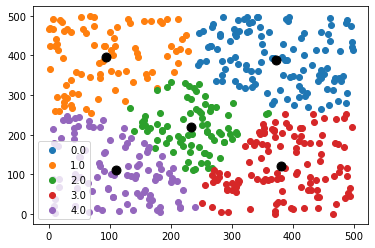

In [5]:
#Plot graphs
def plot_kmeans(clustergroup_new, centroids, dataConsidered):
    #Getting the Centroids
    u_labels = np.unique(clustergroup_new)

    # #plotting the results:
    for p in u_labels:
        plt.scatter(dataConsidered[clustergroup_new == p , 0] , dataConsidered[clustergroup_new == p , 1] , label = p)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black")
    plt.legend()
    plt.show()

plot_kmeans(clustergroup_new, centroids, dataConsidered)


In [ ]:
# Check if clusters are correct